# Yolo Model Evaluation

Visual Evaluation of Pictures

This notebook demonstrates the evaluation of a YOLO-based object detection model on a maize disease dataset. It covers the process of loading test images and ground truth bounding boxes, running model inference, and visually comparing predicted and actual bounding boxes. The workflow leverages the Ultralytics YOLO framework and integrates with Weights & Biases for artifact management. This visual evaluation helps assess the model's performance in detecting and localizing disease symptoms in maize leaf images.

In [2]:
!pip install -U ultralytics wandb
!pip install dotenv
!pip install shapely
!pip install wandb opencv-python

In [3]:
import wandb
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd

In [ ]:
test_img_dir = Path(r'C:\Users\rueed\OneDrive\HSLU\4 Semester\DSPRO02\M-AI_testData\images') 
test_csv_path = Path(r'C:\Users\rueed\OneDrive\HSLU\4 Semester\DSPRO02\M-AI_testData\bboxes_test.csv')  

In [ ]:
api = wandb.Api()
artifact = api.artifact(f"rueedi-tobias-hochschule-luzern/V1_2-maize_disease_detection_train/run_oivwfhzt_model:v0", type="model")
artifact.download()

wandb:   1 of 1 files downloaded.  


'c:\\Users\\rueed\\OneDrive\\HSLU\\4 Semester\\DSPRO02\\M-AI-ZE-Maize-diseases-detection\\notebooks\\artifacts\\run_oivwfhzt_model-v0'

In [ ]:
model = YOLO(r'C:\Users\rueed\OneDrive\HSLU\4 Semester\DSPRO02\M-AI-ZE-Maize-diseases-detection\notebooks\artifacts\run_oivwfhzt_model-v0\best.pt')

def load_bbox_csv(csv_path):
    df = pd.read_csv(csv_path, header=None, skiprows=1)
    out = {}
    for _, row in df.iterrows():
        out.setdefault(row[0], []).append(tuple(map(int, row[1:5])))
    return out

gt_boxes = load_bbox_csv(test_csv_path)


0: 640x640 4 lesions, 521.7ms
Speed: 6.4ms preprocess, 521.7ms inference, 11.5ms postprocess per image at shape (1, 3, 640, 640)


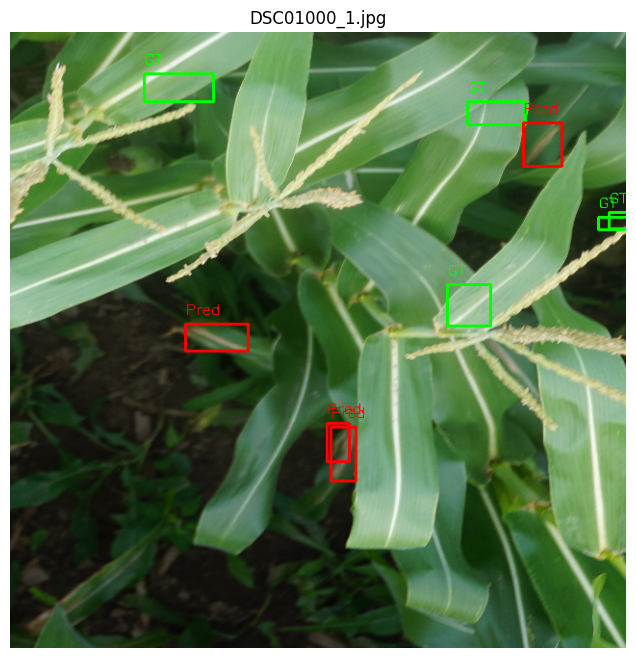


0: 640x640 9 lesions, 414.0ms
Speed: 2.4ms preprocess, 414.0ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


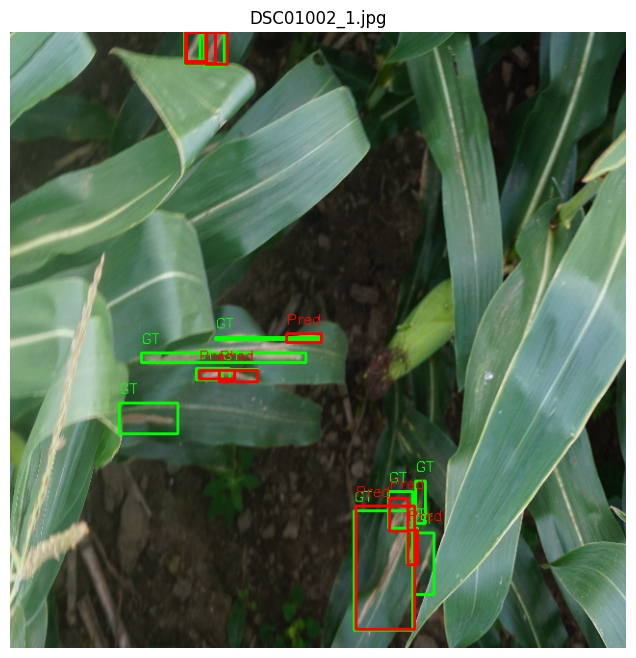


0: 640x640 3 lesions, 414.8ms
Speed: 1.7ms preprocess, 414.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


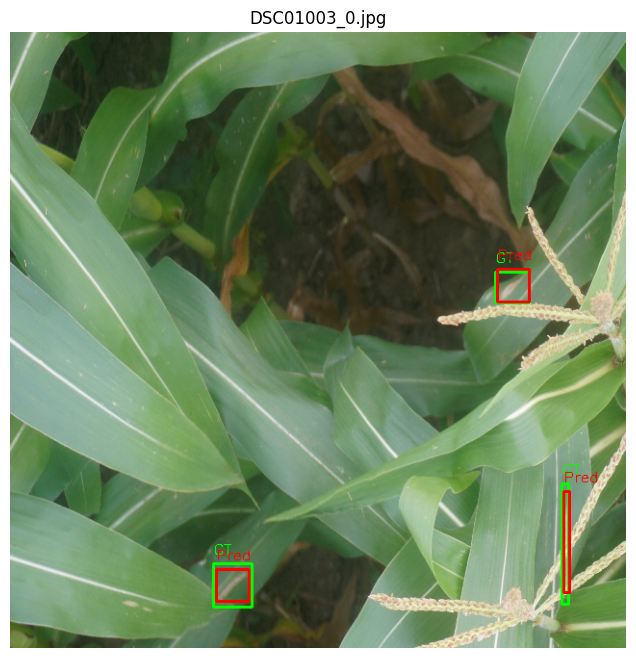


0: 640x640 11 lesions, 490.1ms
Speed: 1.9ms preprocess, 490.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


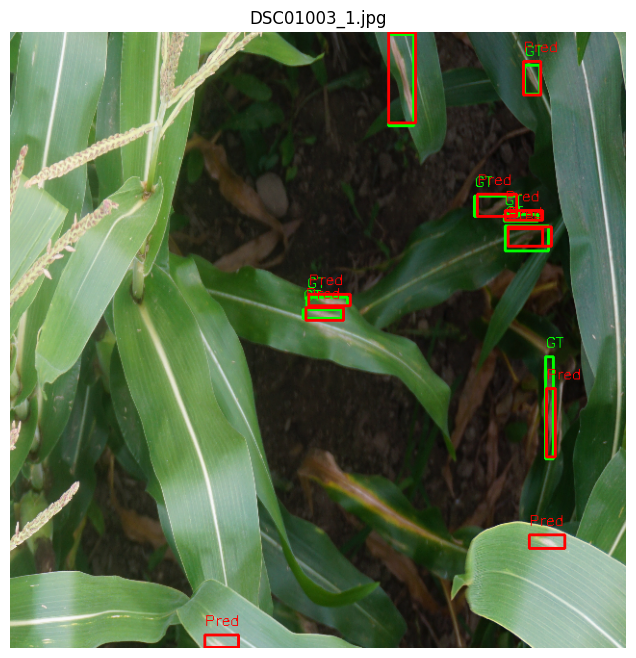


0: 640x640 (no detections), 448.7ms
Speed: 1.5ms preprocess, 448.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


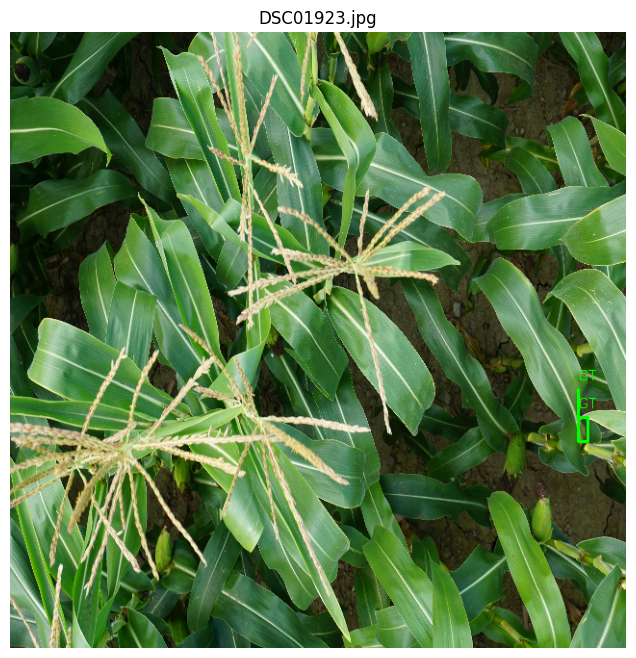


0: 640x640 3 lesions, 499.0ms
Speed: 2.7ms preprocess, 499.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


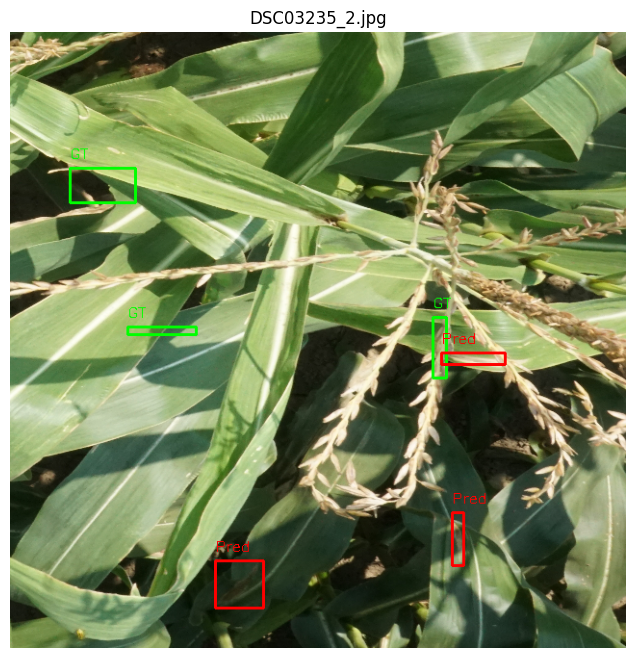


0: 640x640 (no detections), 380.9ms
Speed: 1.8ms preprocess, 380.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


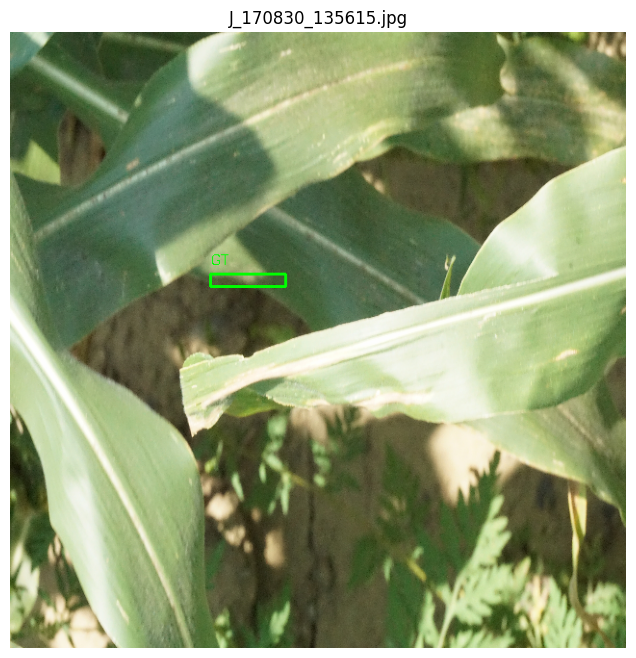


0: 640x640 1 lesion, 442.4ms
Speed: 1.9ms preprocess, 442.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


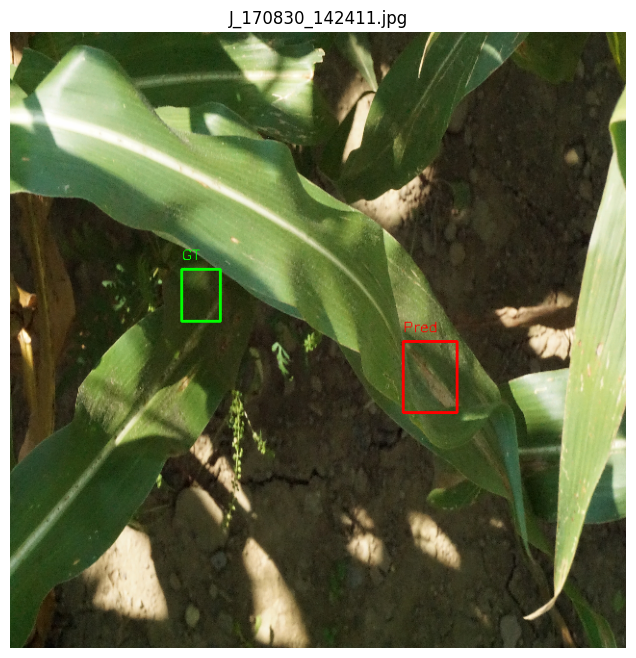


0: 640x640 2 lesions, 462.9ms
Speed: 2.1ms preprocess, 462.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


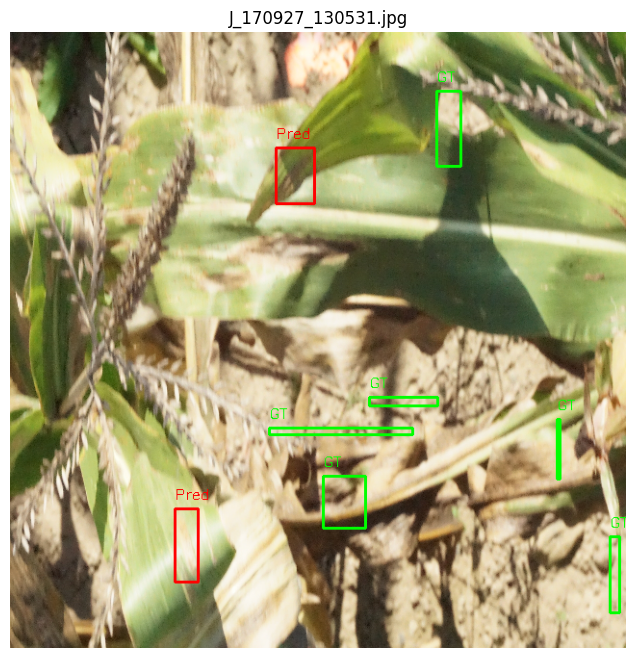


0: 640x640 1 lesion, 395.1ms
Speed: 2.3ms preprocess, 395.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


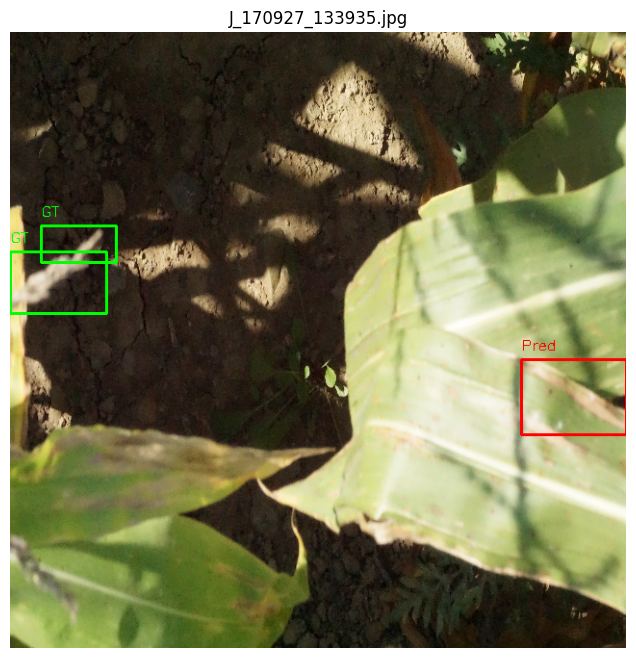

In [ ]:
def plot_boxes(img, boxes, color, label):
    for b in boxes:
        x1, y1, x2, y2 = map(int, b)
        cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
        cv2.putText(img, label, (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)

target_size = 640

for img_file in list(test_img_dir.glob("*.jpg"))[:10]:  
    img = cv2.imread(str(img_file))
    h, w = img.shape[:2]
    img_resized = cv2.resize(img, (target_size, target_size))
    img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)

    true_boxes = gt_boxes.get(img_file.name, [])
    scale_x = target_size / w
    scale_y = target_size / h
    true_boxes_scaled = [
        (
            int(x1 * scale_x),
            int(y1 * scale_y),
            int(x2 * scale_x),
            int(y2 * scale_y)
        ) for (x1, y1, x2, y2) in true_boxes
    ]
    preds = model.predict(img_resized, imgsz=target_size, conf=0.25)[0]
    pred_boxes = preds.boxes.xyxy.cpu().numpy().tolist() if preds.boxes is not None else []

    img_vis = img_rgb.copy()
    plot_boxes(img_vis, true_boxes_scaled, (0,255,0), "GT")
    plot_boxes(img_vis, pred_boxes, (255,0,0), "Pred")

    plt.figure(figsize=(8,8))
    plt.imshow(img_vis)
    plt.title(img_file.name)
    plt.axis('off')
    plt.show()